In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=400, n_features=2, centers=4, cluster_std=1,center_box=(-10,10), random_state=1)
print(X.shape, y.shape)

(400, 2) (400,)


In [2]:
import pandas as pd

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

print(cluster_df.shape)
cluster_df.head(3)

(400, 3)


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_12792\260183880.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,ftr1,ftr2,target
0,-5.923679,-3.157556,3
1,-1.770007,3.789128,0
2,-8.973158,-4.302124,3


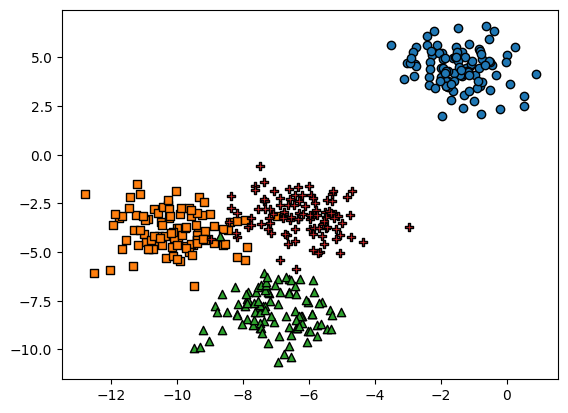

In [3]:
target_list = np.unique(y)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list: 
    target_cluster = cluster_df[cluster_df['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolors='k', marker=markers[target])

plt.show()

In [4]:
# k = 2 일 때
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=200,random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label_2'] = cluster_labels

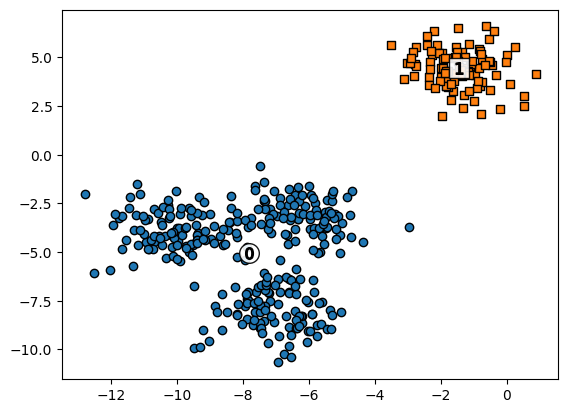

In [5]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label_2'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolors = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)

plt.show()

In [7]:
# k = 3 일 때
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label_3'] = cluster_labels

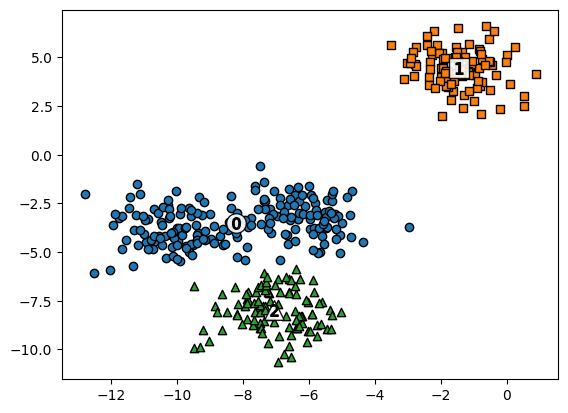

In [8]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label_3'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolors = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)

plt.show()

In [9]:
# k = 4 일 때
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=200,random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label_4'] = cluster_labels

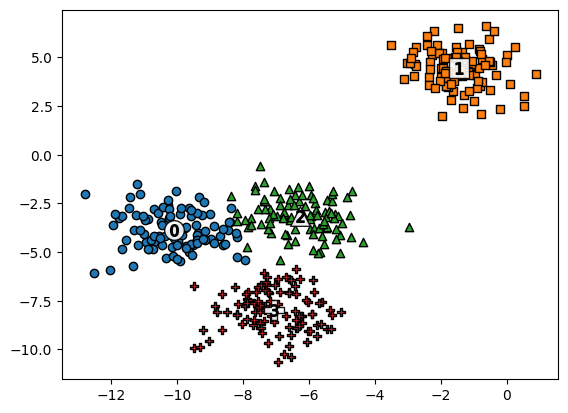

In [10]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label_4'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolors = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)

plt.show()

In [11]:
# k = 5 일 때
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=200,random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label_5'] = cluster_labels

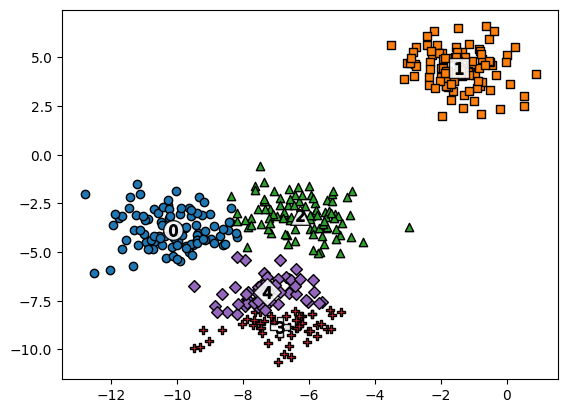

In [12]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label_5'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolors = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)

plt.show()

#### sklearn.metrics.silhouette_samples
- sklearn.metrics.silhouette_samples(X, labels, *, metric='euclidean', **kwds)

In [13]:
from sklearn.metrics import silhouette_samples
# 2-means의 실루엣계수
result_2 = silhouette_samples(X, cluster_df['kmeans_label_2'])
cluster_df['silhouette_coef_2'] = result_2
# 3-means의 실루엣계수
result_3 = silhouette_samples(X, cluster_df['kmeans_label_3'])
cluster_df['silhouette_coef_3'] = result_3
# 4-means의 실루엣계수
result_4 = silhouette_samples(X, cluster_df['kmeans_label_4'])
cluster_df['silhouette_coef_4'] = result_4
# 5-means의 실루엣계수
result_5 = silhouette_samples(X, cluster_df['kmeans_label_5'])
cluster_df['silhouette_coef_5'] = result_5

In [14]:
cluster_df.head()

,ftr1,ftr2,target,kmeans_label_2,kmeans_label_3,kmeans_label_4,kmeans_label_5,silhouette_coef_2,silhouette_coef_3,silhouette_coef_4,silhouette_coef_5
0,-5.923679,-3.157556,3,0,0,2,2,0.596941,0.445181,0.713927,0.708424
1,-1.770007,3.789128,0,1,1,1,1,0.880386,0.867752,0.843384,0.842961
2,-8.973158,-4.302124,3,0,0,0,0,0.740379,0.450590,0.482139,0.481925
3,-6.692425,-8.301718,2,0,2,3,3,0.702662,0.744850,0.735636,0.262091
4,-7.208078,-7.120244,2,0,2,3,4,0.738901,0.653944,0.644978,0.529788


#### sklearn.metrics.silhouette_score
- sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)

In [15]:
# 각 k 값에 따른 실루엣 ㅣ점수
from sklearn.metrics import silhouette_score

silhouette_score_2 = silhouette_score(X,cluster_df['kmeans_label_2'] )

silhouette_score_3 = silhouette_score(X,cluster_df['kmeans_label_3'] )

silhouette_score_4 = silhouette_score(X,cluster_df['kmeans_label_4'] )

silhouette_score_5 = silhouette_score(X,cluster_df['kmeans_label_5'] )

In [16]:
silhouette_score_2, silhouette_score_3, silhouette_score_4, silhouette_score_5

(0.7116932087396148, 0.5852917226919694, 0.633176703932799, 0.5591741258475321)

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

def visualize_silhouette(cluster_lists, X_features) : 
    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows = 1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists) : 
        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n'
                           'Silhouette Score : ' + str(round(sil_avg, 3)))
        axs[ind].set_xlabel('The silhouette coefficient values')
        axs[ind].set_ylabel('Cluster label')
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster) : 
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor = color, edgecolor = color, alpha = 0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color='red', linestyle = '--')

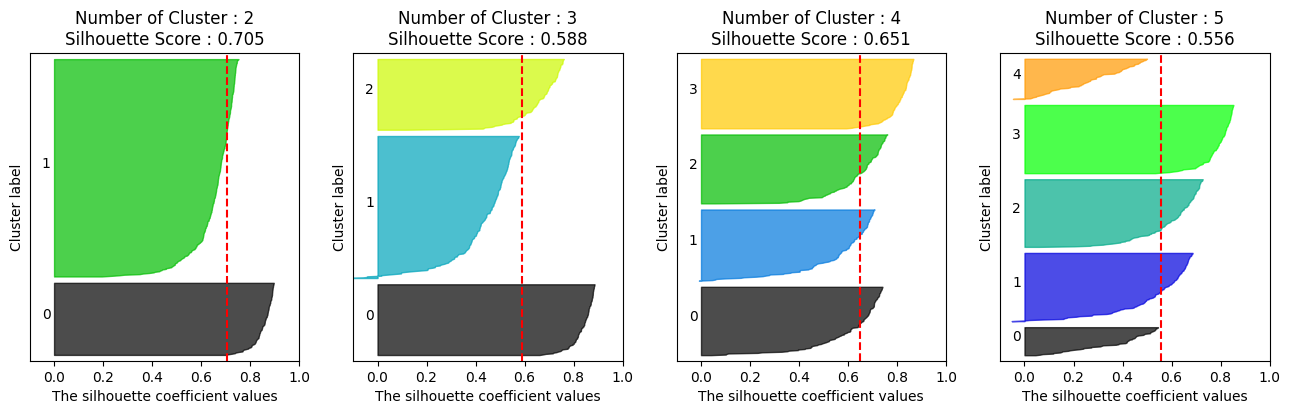

In [18]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle = True, random_state=1)

visualize_silhouette([2, 3, 4, 5], X)

In [19]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data,columns=iris.feature_names)

df_iris['label'] = iris.target

df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples , silhouette_score
n_cluster_list=[2,3,4,5]
n_cols = len(n_cluster_list)
fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows = 1, ncols=n_cols)

for i, cluster in enumerate(n_cluster_list):
    # print(cluster)
    kmeans = KMeans(n_clusters=cluster,init='k-means++',max_iter=200,random_state=0)
    cluster_labels = kmeans.fit_predict(iris.data)
    df_iris[f'kmeans_label_{cluster}'] = cluster_labels
    
    sil_avg = silhouette_score(iris.data, cluster_labels) # 
    sil_values = silhouette_samples(iris.data, cluster_labels)
    df_iris[f'silhouette_score_{cluster}'] = sil_values
    for j in range(n_cluster_list) : 
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(j) / n_cluster_list)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor = color, edgecolor = color, alpha = 0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))
            y_lower = y_upper + 10

    axs[ind].axvline(x=sil_avg, color='red', linestyle = '--')

2
3
4
5
